



*   Accident_Index : Kaza Numarası
*   Location_Easting_OSGR : Konum (Doğu)
*   Location_Northing_OSGR : Konum (Kuzey)
*   Longitude : Boylam
*   Latitude : Enlem
*   Police_Force : Polis Kuvveti
*   Accident_Severity : Kaza Şiddeti
*   Number_of_Vehicles : Araç Sayısı
*   Number_of_Casualties : Yaralı Sayısı
*   Date : Tarih
*   Day_of_Week : Haftanın Günü
*   Time : Zaman
*   LocalAuthority(District): Yerel Yönetim (İlçe)
*   LocalAuthority(Highway): Yerel Yönetim (Karayolu)
*   1st_Road_Class : 1. Yol sınıfı
*   1st_Road_Number : 1. Yol Numarası
*   Road_Type: Yol tipi
*   Speed_limit: Hız limiti
*   Junction_Detail : Kavşak detayı
*   Junction_Contro : Kavşak kontrolü
*   2nd_Road_Class : 2. Yol sınıfı
*   Light_Conditions : Işık Durumu
*   Weather_Conditions : Hava Durumu
*   Road_Surface_Conditions : Yol Yüzey Durumu
*   Carriageway_Hazards : Anayol Tehlikeleri
*   Urban_or_Rural_Area : Kentsel Alan mı Kırsal Alan mı
*  Did_Police_Officer_Attend_Scene_of_Accident : Polis memuru kaza yerine geldi mi
*   Year : Yıl









In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
veriler = pd.read_csv('accidents_2012_to_2014.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
veriler.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,5,20:35,12.0,E09000020,3.0,308.0,Single carriageway,30.0,NaN,Automatic traffic signal,5.0,0.0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1.0,Yes,E01002821,2012.0
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,4,17:00,1.0,E09000033,4.0,412.0,Single carriageway,30.0,NaN,Giveway or uncontrolled,6.0,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1.0,Yes,E01004760,2012.0
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,3,10:07,12.0,E09000020,3.0,3220.0,One way street,30.0,NaN,Giveway or uncontrolled,6.0,0.0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1.0,Yes,E01002893,2012.0
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,4,12:20,12.0,E09000020,5.0,0.0,Single carriageway,30.0,NaN,Giveway or uncontrolled,6.0,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1.0,Yes,E01002886,2012.0
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,3,20:24,12.0,E09000020,4.0,325.0,Single carriageway,30.0,NaN,Giveway or uncontrolled,6.0,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1.0,Yes,E01002890,2012.0


In [ ]:
veriler.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,90395.0,445374.020997,75108.699804,296160.000000,377596.000000,433086.000000,526230.000000,559410.000000
Location_Northing_OSGR,90395.0,341372.568804,136232.498446,156810.000000,183450.000000,391430.000000,432260.000000,654854.000000
Longitude,90395.0,-1.349084,1.096941,-3.605219,-2.338882,-1.495234,-0.180779,0.297345
Latitude,90395.0,52.962658,1.230473,51.295309,51.534774,53.417623,53.784995,55.787016
Police_Force,90395.0,5.720936,5.363960,1.000000,1.000000,5.000000,10.000000,48.000000
Accident_Severity,90395.0,2.833376,0.397994,1.000000,3.000000,3.000000,3.000000,3.000000
Number_of_Vehicles,90395.0,1.813884,0.680720,1.000000,1.000000,2.000000,2.000000,18.000000
Number_of_Casualties,90395.0,1.335494,0.784545,1.000000,1.000000,1.000000,1.000000,15.000000
Day_of_Week,90395.0,4.122839,1.910242,1.000000,3.000000,4.000000,6.000000,7.000000
Local_Authority_(District),90394.0,92.720424,76.274513,1.000000,24.000000,90.000000,147.000000,570.000000


In [ ]:
veriler = veriler.drop(['Junction_Detail','Junction_Control'],axis=1)
veriler.dropna(inplace=True)

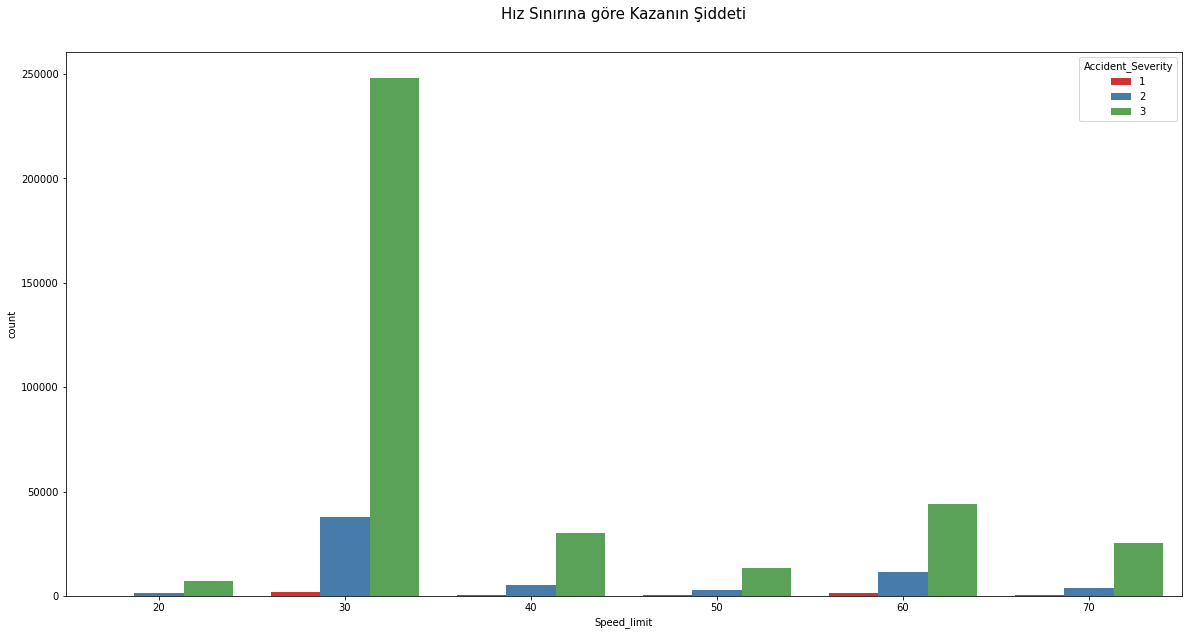

In [ ]:
# Hız Sınırına göre Kazanın Şiddeti:

plt.figure(figsize=(20,10))
sns.countplot(x='Speed_limit', hue='Accident_Severity', data=veriler ,palette="Set1")
plt.title('Hız Sınırına göre Kazanın Şiddeti', size=15, y=1.05)
plt.show()

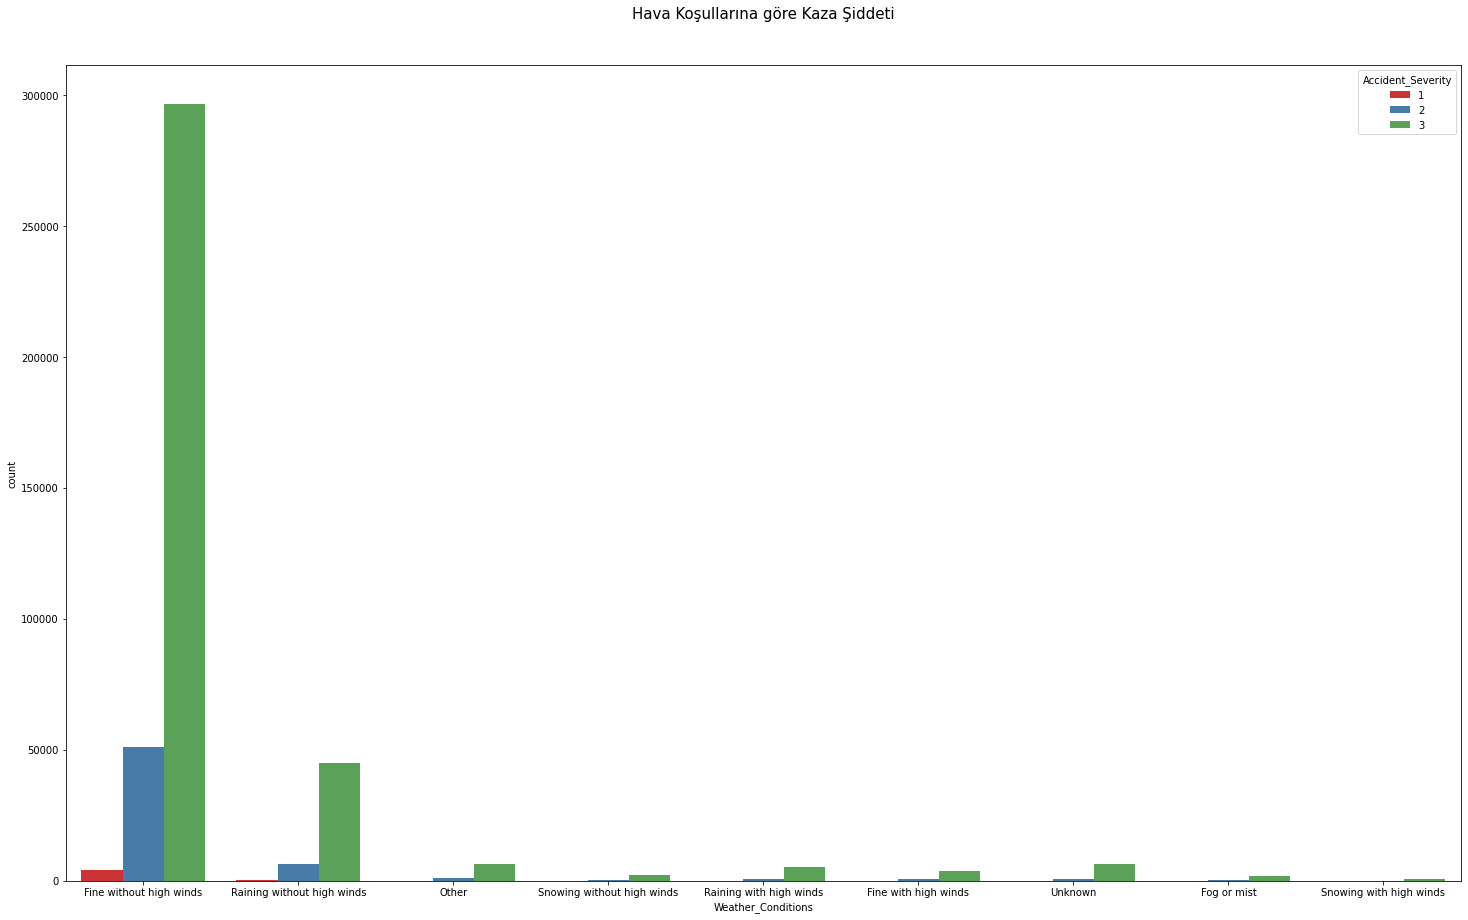

In [ ]:
# Hava Koşullarına göre Kaza Şiddeti:

plt.figure(figsize=(25,15))
sns.countplot(x='Weather_Conditions', hue='Accident_Severity', data=veriler ,palette="Set1")
plt.title('Hava Koşullarına göre Kaza Şiddeti', size=15, y=1.05)
plt.show()

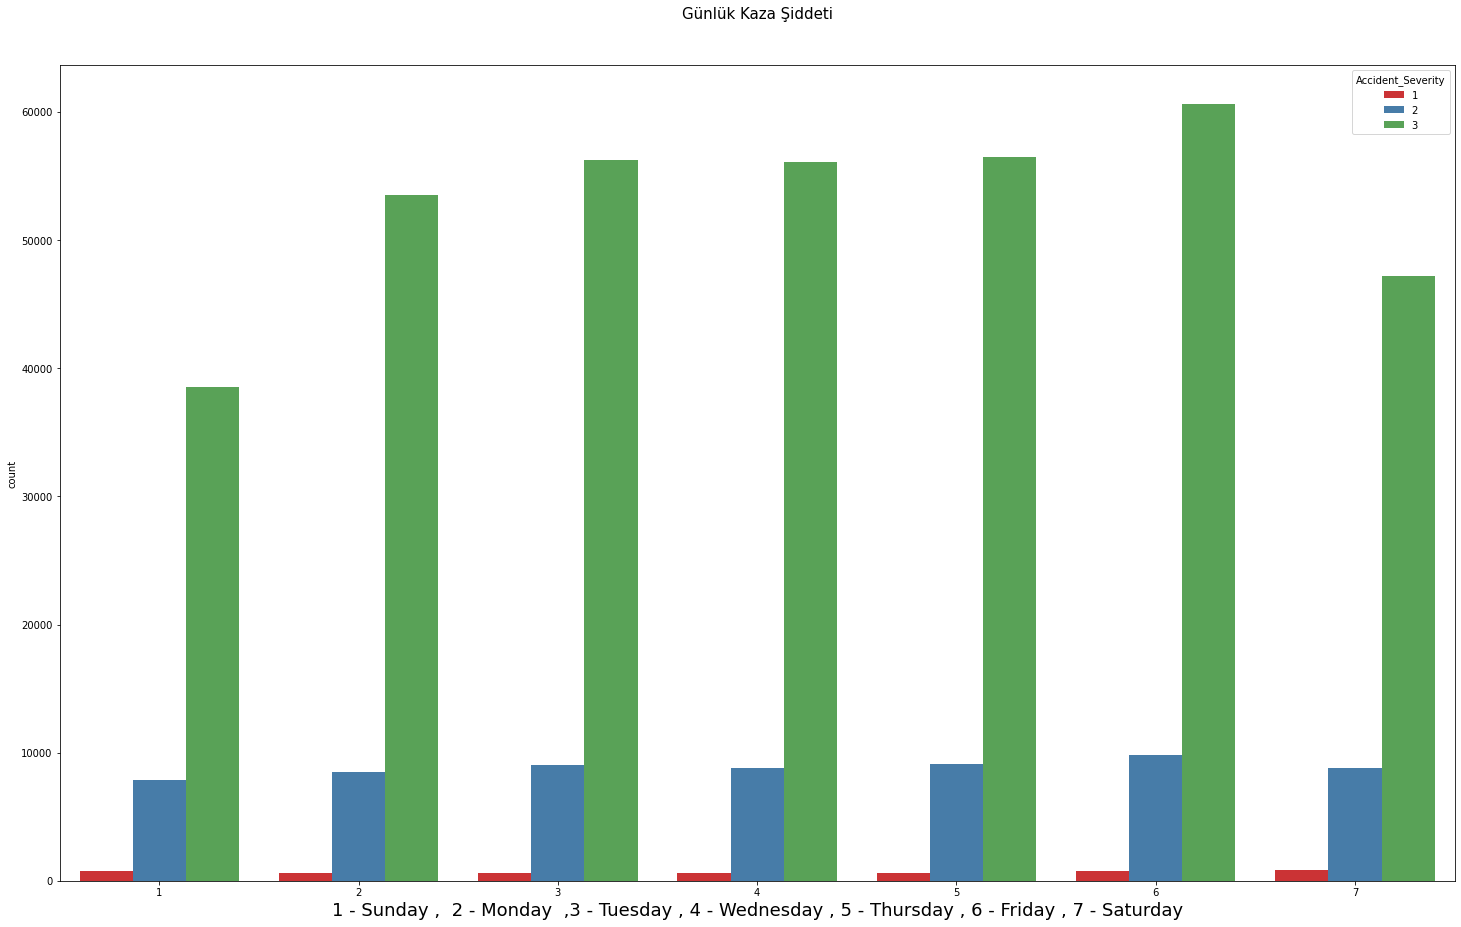

In [ ]:
# Günlük Kaza Şiddeti:
plt.figure(figsize=(25,15))
sns.countplot(x='Day_of_Week', hue='Accident_Severity', data=veriler ,palette="Set1")
plt.title('Günlük Kaza Şiddeti', size=15, y=1.05)
plt.xlabel('1 - Sunday ,  2 - Monday  ,3 - Tuesday , 4 - Wednesday , 5 - Thursday , 6 - Friday , 7 - Saturday' , fontsize = 18)
plt.show()

In [ ]:
def groupby_sıddet(veriler, column):
    col_agg = veriler.groupby(column).Number_of_Casualties.agg(['sum', 'count', 'mean'])
    col_agg.reset_index(inplace = True)
    col_agg.sort_values(by = column, inplace = True)
    return col_agg

In [ ]:
siddet_ag = groupby_sıddet(veriler, 'Accident_Severity').sort_values(by = 'sum')
siddet_ag["Accident_Severity"].replace({1: "Ölümcül", 2: "Orta", 3: "Hafif"}, inplace=True)
area_ag = groupby_sıddet(veriler, 'Urban_or_Rural_Area').sort_values(by = 'sum')
area_ag["Urban_or_Rural_Area"].replace({1: "Kentsel", 2: "Kırsal", 3: "Belirsiz"}, inplace=True)

In [ ]:
labels1 = siddet_ag["Accident_Severity"].values.tolist()
labels2 = area_ag["Urban_or_Rural_Area"].values.tolist()
values_acc = siddet_ag["sum"].values.tolist()
values_area = area_ag['sum'].values.tolist()

In [ ]:
night_colors = ['rgb(56, 75, 126)', 'rgb(18, 36, 37)', 'rgb(34, 53, 101)', 'rgb(6, 4, 4)']
cafe_colors =  ['rgb(146, 123, 21)', 'rgb(177, 180, 34)', 'rgb(206, 206, 40)', 'rgb(35, 36, 21)']

specs = [[{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=1, cols=2, specs=specs, subplot_titles=['<b> Trafik Kazalarının Şiddet Seviyeleri <b>', 
                                                                 '<b> Trafik Kazalarının Gerçekleştiği Alanlar <b>'])


fig.add_trace(go.Pie(labels=labels1, values=values_acc, name='Accident Severity',
                     marker_colors= night_colors, textinfo='label+percent'), 1, 1)

fig.add_trace(go.Pie(labels=labels2, values=values_area, name='Urban or Rural Area',
                     marker_colors= cafe_colors, textinfo='label+percent'), 1, 2)


fig = go.Figure(fig)
fig.show()